<a href="https://colab.research.google.com/github/jiayuanteng/Hands_on_ML2/blob/main/5_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris dataset


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC



# Support Vector Machine (Soft Margin Classifier)
One can work out oportimization problem of SVM as the Lagrange function below, where n is # of instances in the training data and p is # of features. The first term is a loss function (hinge loss). The second term is a regularization.  
  

Ł = $\sum_{n=1}^{n}max[0, 1-y_{i}(\beta_{0}+
\beta_{1}x_{i1} +...+ \beta_{p}x_{ip})]
+ λ\sum_{j=1}^{p}\beta_{j}^2$


λ is nonnegative tuning parameter. It is equivalent to the cost parameter C that regularizes # of violations to the margin. When λ is large, β is small and more voilations to margin are tolerated and a low-variance and high-margin classifier will result.





In [3]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# select petal length, petal width in X
# select iris virginica in y

X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

In [7]:
svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss = "hinge")),

])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [9]:
# add non-linearity inyo LinearSVC

from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15, random_state=42)
polynomial_svm_clf = Pipeline([
                              ("poly_features", PolynomialFeatures(degree=3)),
                              ("scaler", StandardScaler()),
                              ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])



In [10]:
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [11]:
poly_kernel_svm_clf = Pipeline([
                                ("scaler", StandardScaler()),
                                ("svm_clf", SVC(C = 5, kernel = "poly", degree = 3, coef0 = 1))

])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

# Tackle nonlinearity: 
1. use polynomial function, e.g., degress = 3: $x+x^{2}+x^{3}$. Can acheive this using LinearSVC
2. add features computed with a similarity function which measures how much each instance resembles a particular landmark. Can achieve this using SVC with a defined kernel function

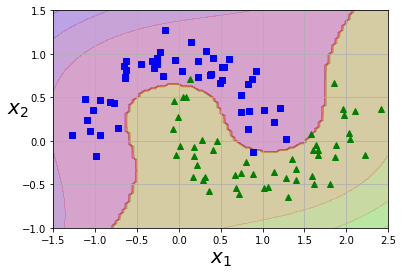

In [62]:
# Plot classifer
import matplotlib.pyplot as plt


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)



def plot_prediction(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  # change x0s to 100 by 100
  x0, x1 = np.meshgrid(x0s, x1s)
  # flatten x0s. shape becoems 1D 10000
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
  plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)

plot_prediction(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
X, y = make_moons(n_samples = 100, noise = 0.15, random_state=42)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

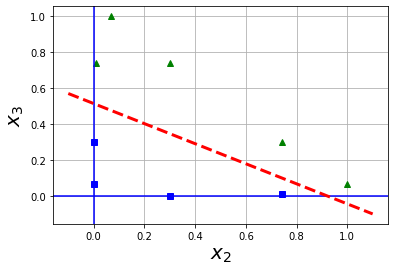

In [98]:
# use Gaussian Radial Basis Function (RBF ) as similarity function
def rbf(x_l, gamma = -0.3):
  return np.exp(gamma*x_l**2)

def similarity_feature(raw_data, x0_2, x0_3, gamma = -0.3):
  x2 = np.exp(gamma*np.abs(raw_data - x0_2)**2)
  x3 = np.exp(gamma*np.abs(raw_data - x0_3)**2)

  return x2, x3

g1 = np.array([-4, -3, 3, 4])
g2 = np.array([-2, -1, 0, 1, 2])

x0_2 = np.array([-2])
x0_3 = np.array([1])


g1_x2, g1_x3 = similarity_feature(g1,x0_2, x0_3)

g2_x2, g2_x3 = similarity_feature(g2,x0_2, x0_3)

plt.grid(True, which='both')
plt.plot(g1_x2, g1_x3, "bs")
plt.plot(g2_x2, g2_x3, "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$", fontsize=20)
plt.axhline(y=0, color='b', linestyle='-')
plt.axvline(x=0, color='b', linestyle='-')
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.show()

In [99]:
rbf_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001))
                               
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [85]:
np.abs(raw_data - x0_3)

array([5, 4, 2, 3])

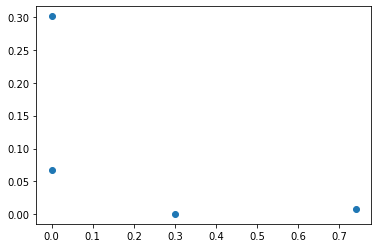

In [88]:
plt.scatter(x2, x3)

In [49]:
x0

array([[-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       ...,
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ]])

In [58]:
x0.ravel()[:103]

array([-1.5       , -1.45959596, -1.41919192, -1.37878788, -1.33838384,
       -1.2979798 , -1.25757576, -1.21717172, -1.17676768, -1.13636364,
       -1.0959596 , -1.05555556, -1.01515152, -0.97474747, -0.93434343,
       -0.89393939, -0.85353535, -0.81313131, -0.77272727, -0.73232323,
       -0.69191919, -0.65151515, -0.61111111, -0.57070707, -0.53030303,
       -0.48989899, -0.44949495, -0.40909091, -0.36868687, -0.32828283,
       -0.28787879, -0.24747475, -0.20707071, -0.16666667, -0.12626263,
       -0.08585859, -0.04545455, -0.00505051,  0.03535354,  0.07575758,
        0.11616162,  0.15656566,  0.1969697 ,  0.23737374,  0.27777778,
        0.31818182,  0.35858586,  0.3989899 ,  0.43939394,  0.47979798,
        0.52020202,  0.56060606,  0.6010101 ,  0.64141414,  0.68181818,
        0.72222222,  0.76262626,  0.8030303 ,  0.84343434,  0.88383838,
        0.92424242,  0.96464646,  1.00505051,  1.04545455,  1.08585859,
        1.12626263,  1.16666667,  1.20707071,  1.24747475,  1.28